In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson
plt.rcParams.update({'font.size': 14})
from scipy.integrate import solve_ivp

In [2]:
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 1000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def hamildriven(N,omega,q0,myu,n,omega1,epsilon,phi):
    T=2*np.pi/omega1
    t=np.linspace(0,1000,1000)
    t=t*T
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=[]
    for i in range (len(t)):
        H.append(omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(1j*epsilon*t[i]*(a+adag)))
    return H    
    #H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(cosine)
    
    return H
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def twovdpcoper1(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(adag,I)
    c2=sqrt(const2)*(tensor(a**2,I))
    c3=sqrt(myu)*(tensor(adag*a,I)-0.5*tensor(adag**2,I))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def twovdpcoper2(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(I,adag)
    c2=sqrt(const2)*(tensor(I,a**2))
    c3=sqrt(myu)*(tensor(I,adag*a)-0.5*tensor(I,adag**2))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
    
def twovdpcouplingcoper(cops1,cops2,N,D):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    for i in range(len(cops1)):
        cops.append(cpos1[i])
    for i in range(len(cops2)):
        cops.append(cpos2[i])
    c3=sqrt(D)*(tensor(a,I)-tensor(I,a))
    cops.append(c3)
    return cops
def linexp(x,A,alpha,mean):
    y=A*(x**2)*np.exp(-(alpha)*(x-mean)**2)
    #y=A*x
    return y
def probrec(myu,q0,diag):
    N=3000
    p=np.zeros(N)
    #p[0]=np.random.uniform(0,1)
    #p[1]=np.random.uniform(0,1)
    p[0]=0
    p[1]=diag[0]
    p[2]=diag[1]
    #p[2]=np.random.uniform(0,1)
    n=0
    for i in range(N-3):
        p[i+3]=-(4/(3*myu*(n+2)))*(((-myu*(q0**2-1))*p[i+1])+((3*myu/4)*(n*p[i+2]))-((myu/4)*(n*p[i]+(n+2)*p[i+1])))
        n+=1
        
    return p
def coherence(dm,N):
    add=0
    s=dm.full()
    for j in range(N):
        for k in range(N):
            if (j!=k):
                add+=abs(s[j][k])
    return add
def model(z,t,myu,q0):
    omega=1
    x=z[0]
    y=z[1]
    dxdt=omega*y
    dydt=-myu*dxdt*(x**2-q0**2)-omega*x
    dzdt=[dxdt,dydt]
    return dzdt
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def expdecay(x,lam,A):
    y=A*np.exp(-lam*x)
    return y
def linfit(x,lam,C):
    y=lam*x+C
    return y
def sinfreq(x,A,omega,phi):
    y=A*np.sin(omega*x+phi)
    return y
def eig(myu,qo,omega):
    e=[((myu*q0**2)+1j*sqrt(4*omega**2-(myu**2)*q0**4))/2,((myu*q0**2)-1j*sqrt(4*omega**2-(myu**2)*q0**4))/2]
    return e
def retindex(tl,period):
    index2=0
    t2=0
    t2=tl[0]+abs(period)
    epi=0.01
    for i in range(len(tl)):
        if tl[i]<=(t2+epi) and tl[i]>=(t2-epi):
            index2=i
    return index2
def jacob(omega,q0,myu,q,p):
    j=np.zeros((2,2))
    j[0][0]=0
    j[0][1]=omega
    j[1][0]=-2*myu*q*p-omega
    j[1][1]=-myu*(q**2-q0**2)
    return j
def floquet(omega,q0,myu,position,momentum,times,T):
    final=np.identity(2)
    I=np.identity(2)
    for i in range(len(times)):
        q=position[i]
        p=momentum[i]
        final=final*(I+(T/len(times))*(jacob(omega,q0,myu,q,p)))
    return final
def square(list):
    return [i ** 2 for i in list]
def findper(xl,tl,ep):
    k=0
    for i in range(1,len(xl)):
        if (xl[i]<(xl[0]+ep)) and (xl[i]>(xl[0]-ep)):
            k=i
    tp=tl[k]-tl[0]
    return 2*tp
def vdp(t,z):
    x, y = z
    return [omega*y, -mu*y*(x**2-q0**2)-omega*x]

def root(t, y): return y[0] 
       

In [3]:
q0=3
omega=1
N=30
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)

In [4]:
myu=np.linspace(0.001,6,80)
H=[]
cops=[]
ss=[]

In [5]:
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

In [6]:
taulist=np.linspace(0.0, 100.0, 1000)
wlist = np.linspace(0,1.4, 1000)
a=destroy(N)
adag=a.dag()
dev=[]
neww=[]

In [7]:
for k in range(len(myu)):
    spec = spectrum(H[k], wlist, cops[k], a.dag(), a)
    for i in range(len(spec)):
        if spec[i]==max(spec):
            w=wlist[i]
            break
    dev.append(omega-w)
    neww.append(w)

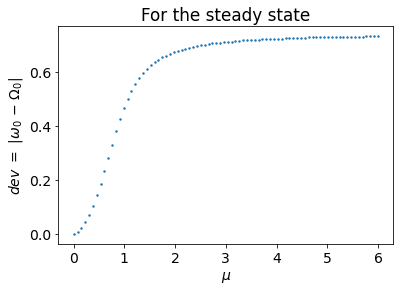

In [8]:
plt.scatter(myu,dev,s=2)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$dev$ $=$ $|$$\omega_0$ $-$ $\Omega_0$$|$')
plt.title('For the steady state')
plt.savefig('devvsmyu.png')

In [9]:
dev

[-0.0006006006006005205,
 0.00640640640640644,
 0.02042042042042047,
 0.0428428428428429,
 0.07087087087087096,
 0.10450450450450455,
 0.14374374374374377,
 0.18578578578578586,
 0.23203203203203204,
 0.2810810810810811,
 0.33013013013013015,
 0.3791791791791792,
 0.42402402402402406,
 0.4646646646646647,
 0.49969969969969974,
 0.5291291291291291,
 0.5543543543543543,
 0.5767767767767769,
 0.5949949949949951,
 0.6104104104104104,
 0.623023023023023,
 0.6342342342342342,
 0.644044044044044,
 0.6524524524524524,
 0.6594594594594595,
 0.6664664664664666,
 0.6720720720720721,
 0.6762762762762763,
 0.6804804804804805,
 0.6846846846846847,
 0.6888888888888889,
 0.6916916916916918,
 0.6944944944944945,
 0.6972972972972973,
 0.7001001001001002,
 0.7015015015015016,
 0.7043043043043044,
 0.7057057057057057,
 0.7071071071071071,
 0.7085085085085085,
 0.70990990990991,
 0.7113113113113113,
 0.7127127127127127,
 0.7141141141141141,
 0.7155155155155155,
 0.716916916916917,
 0.716916916916917,
 0.71

In [10]:
period=[]
t=np.linspace(0.0, 100.0, 1000)
for i in range(len(myu)):
    mu=myu[i]
    q0=3
    sol = solve_ivp(vdp, [0, 100], [1, 0], t_eval=t,events=root)
    zeros = sol.t_events[0]
    spacing = zeros[1:] - zeros[:-1]
    deltas = spacing[1:] - spacing[:-1]
    period.append(2*spacing[-1])
freq=[]
devc=[]
for i in range(len(myu)):
    freq.append((2*np.pi)/period[i])
    devc.append(1-freq[i])    

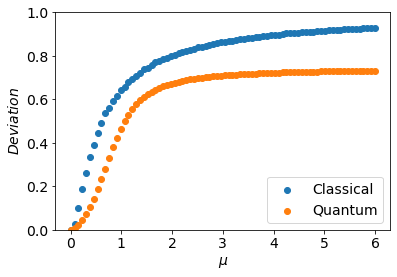

In [11]:
plt.scatter(myu,devc,label='Classical')
plt.scatter(myu,dev,label='Quantum')
plt.ylim(0,1)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$Deviation$')

plt.legend()
plt.savefig('classquantdevvsmyu.png')

In [12]:
devc

[-0.00030908096594739476,
 0.027493742833442303,
 0.10099396650022674,
 0.185405509881433,
 0.2602771415694334,
 0.333143804657432,
 0.39209928551143214,
 0.44416044918704434,
 0.48990341997179554,
 0.5355172554464536,
 0.5597206957274868,
 0.5933288942381024,
 0.6155797547649207,
 0.6426922905245216,
 0.6581535878848347,
 0.6787887788017837,
 0.6938260737530035,
 0.7081688745141738,
 0.7218728426766344,
 0.7385657803798962,
 0.7463280904565086,
 0.75612236173023,
 0.7705443007969789,
 0.7750214741087409,
 0.7834062020135423,
 0.7914170846114597,
 0.7982417989613024,
 0.8048460832134781,
 0.8115675139265196,
 0.8166149767903258,
 0.822446914169997,
 0.828275546742761,
 0.8325426729905159,
 0.8393716480794555,
 0.8416269630000739,
 0.8454273956756346,
 0.8497591869440128,
 0.853369822099784,
 0.857816574648404,
 0.8636584076971476,
 0.8645802999028697,
 0.8674228535046045,
 0.8700362730034561,
 0.8729697261058179,
 0.8762139531921026,
 0.8793320606383584,
 0.8836891939524256,
 0.8834780